# Introductory Examples

## Example: Plotting a White Noise Process

In [8]:
using LinearAlgebra, Statistics, Plots

In [2]:
# Base Julia function returning a single draw from normal 
# distribution with mean 0 and variance 1 
randn()

-0.25077919894438827

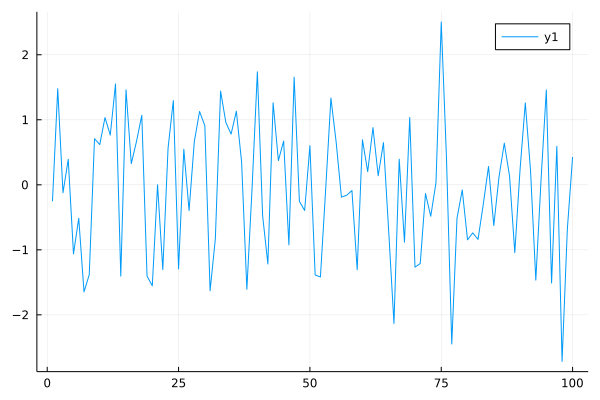

In [2]:
using Plots 

n = 100
ϵ = randn(n) # returns a column vector with n draws from normal with mean 0, var 1 
plot(1:n, ϵ)

In [6]:
# Check data type 
typeof(ϵ)

Vector{Float64} (alias for Array{Float64, 1})

In [8]:
ϵ[1:5] # Note that array indices start at 1, not 0 

5-element Vector{Float64}:
  1.5017894670782712
 -0.7292353088584245
 -0.1267286095416641
  0.4577901506139019
  0.37190068240308866

In [12]:
# As practice we can rewrite this simple program using for loops

# Poor style
n = 100 
ϵ = zeros(n)
for i in 1:n 
    ϵ[i] = randn()
end
plot(1:n,ϵ)

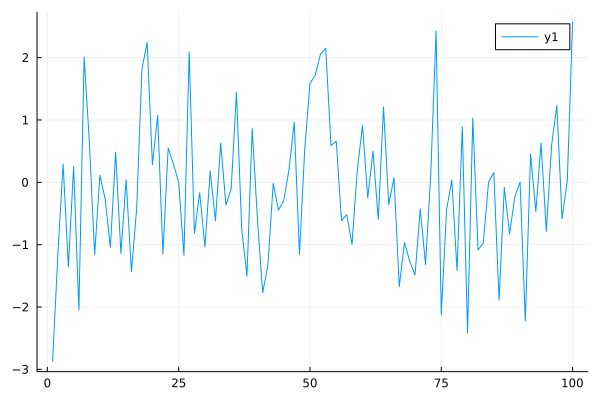

In [13]:
# Better style 
n = 100 
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end
plot(1:n, ϵ)

In [18]:
# In Julia, you can also loop directly over arrays themselves
ϵ_sum = 0.0 # need to use 0.0 here to get the right type 
m = 5 
for ϵ_val in ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val 
end 
ϵ_mean = mean(ϵ[1:m])
ϵ_mean ≈ ϵ_sum / m


true

### User-defined functions

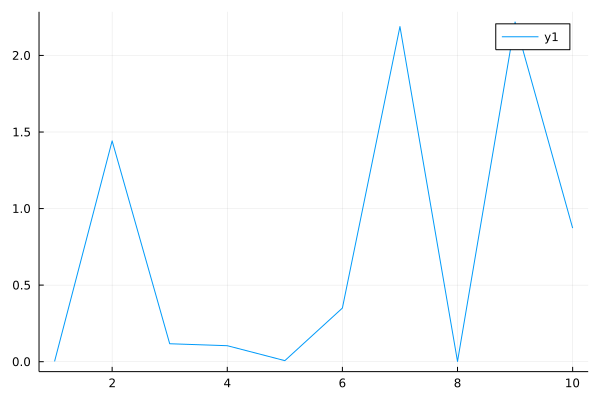

In [19]:
# Poor style 
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2 # square the result 
    end 
    return ϵ
end

data = generatedata(10)
plot(data)

In [20]:
# still poor style 
function generatedata(n)
    ϵ = randn(n) # use built in function, instead of manually looping
    
    for i in eachindex(ϵ)
        ϵ[i] = ϵ[i]^2 # squaring the result 
    end 
    
    return ϵ 
end
data = generatedata(5)

5-element Vector{Float64}:
 1.0244071623516084
 1.4228815580665455
 2.2352247630808426
 0.1313286152629061
 0.04078262859379565

In [22]:
# NOTE. Replacing the for loop with a vectorized approach is for clarity. 
# With Julia, it's not more efficient!

# better style 
function generatedata(n)
    ϵ = rand(n) 
    return ϵ.^2
end
data = generatedata(5)

5-element Vector{Float64}:
 0.1627593502204216
 0.004727634829921484
 0.7806800384397985
 0.0047236879866812504
 0.40121200064596807

In [24]:
# good style 
generatedata(n) = randn(n).^2
data = generatedata(5)

5-element Vector{Float64}:
 0.016419543766462267
 1.453157854481485
 0.035300162709235465
 0.15231647005449436
 0.1756368035597699

In [28]:
# Another "good style" approach
f(x) = x^2 
generatedata(n) = f.(randn(n))
data = generatedata(5)

5-element Vector{Float64}:
 1.5865920367017416
 1.8429566815353111
 0.47019576644137945
 1.9042883389494083
 0.0010451885998990433

In [30]:
# A final, more abstract approach. 
generatedata(n, gen) = gen.(randn(n)) # uses broadcast 

f(x) = x^2
data = generatedata(5, f) # applies f

5-element Vector{Float64}:
 6.750255588840434
 0.013211577420710595
 3.7953873752524325
 0.1219523705449346
 0.054598851942571296

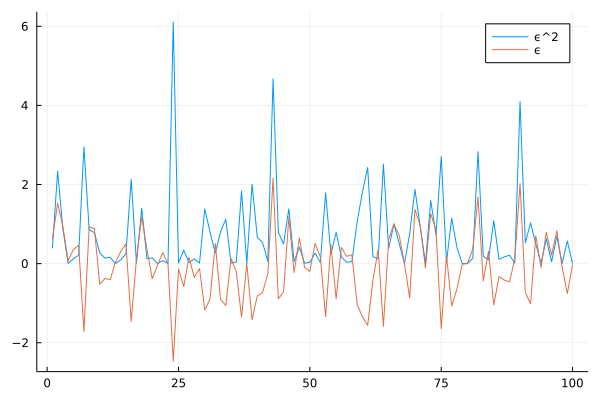

In [33]:
# direct solution with broadcasting and small user-defined function
n = 100 
f(x) = x^2 

ϵ = randn(n)
plot(f.(ϵ), label= "ϵ^2")
plot!(ϵ, label= "ϵ") # layer on the same plot

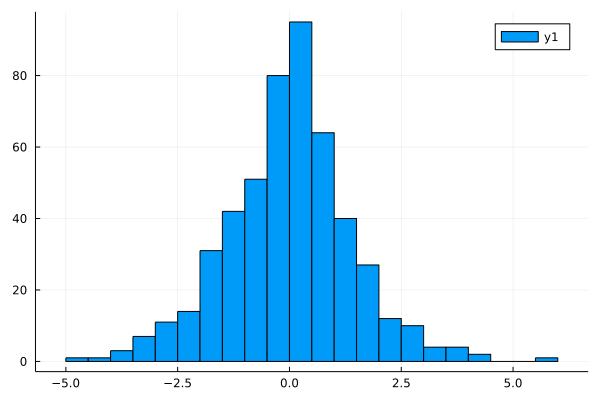

In [3]:
# A slightly more useful function 
using Distributions 

function plothistogram(distribution, n) 
    ϵ = rand(distribution, n) # n draws from distribution 
    histogram(ϵ)
end 

lp = Laplace()
plothistogram(lp, 500)

## Example: Variations on Fixed Points

### Fixed Point Maps
Consider the following equation where $p, \beta$ are given and $v$ is the scalar we wish to solve for 

<a id='equation-fixed-point-map'></a>
$$ v = p + \beta v.$$ 

We can express this as 
$$v=f(v) , \tag{1} $$ where $f(v):= p + \beta v$. In this simple example a fixed point $v^*$ of $f(\cdot)$ is a solution to the problem.

### While Loops 

One approach to finding a fixed point of [(1)](#equation-fixed-point-map) is to start with an initial value, and iterate the map

$$
v^{n+1}=f(v^n) \tag{2}.
$$

For this exact `f` function, we can see the converge to $v=p/(1-\beta)$ when $|\beta|<1$ by iterating backwards and taking $n\rightarrow \infty$

$$
v^{n+1}=p+\beta v^n = p \sum^{n-1}_{i=0}\beta^i+\beta^nv_0.
$$

To implement [2], we start by solving this problem with a `while` loop. We'll first solve this using "poor style" similar to how you would implement this in MATLAB and then solve it using "better style"

In [11]:
# poor style 
p = 1.0 # note 1.0 rather than 1 so that the type is right 
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8 # initial condition 

# setup the algorithm 
v_old = v_iv 
normdiff = Inf 
iter = 1 
while normdiff > tolerance && iter <= maxiter 
    v_new = p + β * v_old # the f(v) map 
    normdiff = norm(v_new - v_old) 
    
    # replace and continue 
    v_old = v_new 
    iter = iter + 1 
end 

println("Fixed point = $v_old, and |f(x)-x| = $normdiff in $iter iterations.")

Fixed point = 9.999999173706609, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations.


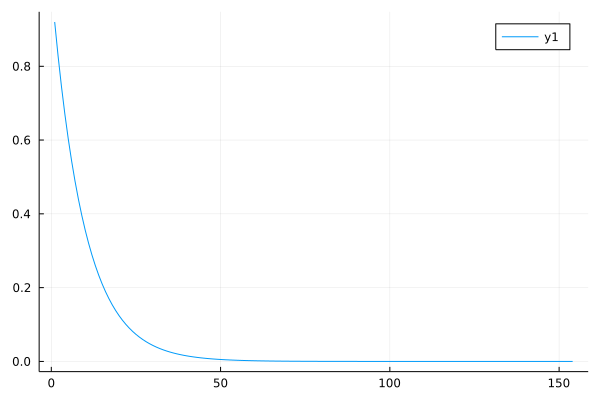

In [19]:
 # Alternate approach using for loops 
v_old = v_iv 
normdiff = Inf 
normdiff_vec = zeros(maxiter)
for i in 1:maxiter
    v_new = p + β * v_old # the f(v) map 
    normdiff = norm(v_new - v_old) 
    normdiff_vec[i] = normdiff
    
    # if we converge, then no need to iterate further
    if normdiff < tolerance # check convergence
        iter = i 
        break # conveged, exit loop 
    end 
    
    # else, 
    v_old = v_new 
end 
plot(1:iter, normdiff_vec[1:iter])

### Using a function

In [26]:
# better, but still poor style 
function v_fp(β, p, v_iv, tolerance, maxiter)
    
    # setup the algorithm 
    v_old = v_iv 
    normdiff = Inf 
    iter = 1 
    while normdiff > tolerance && iter <= maxiter 
        v_new = p + β * v_old # the f(v) map 
        normdiff = norm(v_new - v_old) 
        
        # replace and continute 
        v_old = v_new 
        iter = iter + 1 
    end 
    return (v_old, normdiff, iter) # returns a tuple 
end 

# some values 
p = 1.0 
β = 0.9
maxiter = 1000 
tolerance = 1.0E-7
v_iv = 0.8 # initial condition 
v_star, normdiff, iter = v_fp(β, p, v_iv, tolerance, maxiter)
println("Fixed point = $v_star, and |f(x)-x| = $normdiff in $iter iterations.")

Fixed point = 9.999999173706609, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations.


In [25]:
# Better style where we pass the function as an argument
function fixedpointmap(f, iv, tolerance, maxiter) 
    # setup the algorithm 
    x_old = iv 
    normdiff = Inf 
    iter = 1 
    while normdiff > tolerance && iter <= maxiter 
        x_new = f(x_old) # use the map passed as an arg 
        normdiff = norm(x_new - x_old) 
        x_old = x_new 
        iter = iter + 1 
    end
    return (x_old, normdiff, iter)
end

# define a specific map and parameter values 
p = 1.0 
β = 0.9 
f(v) = p + β * v 

maxiter = 1000 
tolerance = 1.0E-7 
v_initial = 0.8 # initial condition 

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter) 
println("Fixed point = $v_star, and |f(x)-x| = $normdiff in $iter iterations.")

Fixed point = 9.999999173706609, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations.


In [29]:
# good style 
# Improvements include requiring parameters to be called by name, default values, and a named return tuple 

function fixedpointmap(f; iv, tolerance = 1.E-7, maxiter=1000)
    #setup the algorithm 
    x_old = iv 
    normdiff = Inf 
    iter = 1 
    while normdiff > tolerance && iter < maxiter
        x_new = f(x_old) 
        normdiff = norm(x_new - x_old) 
        x_old = x_new 
        iter = iter + 1 
    end
    return (value = x_old, normdiff=normdiff, iter=iter) 
end

# define a map and parameters 
p = 1.0 
β = 0.9 
f(v) = p + β * v 

sol = fixedpointmap(f, iv=0.8)
println("Fixed point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations.")

Fixed point = 9.999999173706609, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations.


In [31]:
# to highlight the flexibility of this code, we apply it to find another fixed point 

r = 2.0 
f(x) = r * x * (1 - x)
sol = fixedpointmap(f, iv = 0.8) 
println("Fixed point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations.")

Fixed point = 0.4999999999999968, and |f(x)-x| = 3.979330237546819e-8 in 7 iterations.


### Using a package 

In [35]:
# best style 
using NLsolve 

p = 1.0 
β = 0.9 
f(v) = p .+ β * v
sol = fixedpoint(f, [0.8]; m = 0) 
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [9.999999909587816], and |f(x) - x| = 9.041219328764782e-9 in 176 iterations


In [36]:
# best style ( Anderson iteration. Fewer iterations, but they're more computationally intensive)
using NLsolve

p = 1.0
β = 0.9
iv = [0.8]
sol = fixedpoint(v -> p .+ β * v , iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [9.999999999999972], and |f(x) - x| = 3.552713678800501e-15 in 3 iterations


In [37]:
# use arbitrary precision floating points

p = 1.0
β = 0.9
iv = [BigFloat(0.8)] # higher precision
sol = fixedpoint(v -> p .+ β * v , iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155], and |f(x) - x| = 0.0 in 3 iterations


In [38]:
# The algorithm we wrote works with bivariate maps 
p = [1.0, 2.0]
β = 0.9 
iv = [0.8, 2.0]
f(v) = p .+ β * v 

sol = fixedpointmap(f, iv=iv, tolerance = 1.0E-8)
println("Fixed point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations.")

Fixed point = [9.999999961080519, 19.999999923853192], and |f(x)-x| = 9.501826248250528e-9 in 184 iterations.


In [40]:
using NLsolve, StaticArrays 
p = @SVector [1.0, 2.0, 0.1] 
β = 0.9 
iv = [0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v , iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero) - sol.zero)) in " *
        "$(sol.iterations) iterations")

Fixed point = [10.0, 20.000000000000004, 0.9999999999999929], and |f(x) - x| = 6.661338147750939e-16 in 3 iterations


## Exercises
### Exercise 1 
Write your own version of factorial, called `factorial2`, using a `for` loop.

In [57]:
# Define function
function factorial2(n)
    result = 1
    iter = n
    for i in 1:n
        result = result * iter
        iter = iter - 1 
    end
    return result
end

# Test algorithm 
for i in 1:15
    if factorial2(i)!=factorial(i)
        println("broken! doesn't work with $i")
    end 
end
println("if this is the only message, we're good!")

if this is the only message, we're good!


### Exercise 2 

The binomial random variable $Y\tilde Bin(n,p)$ represents 
- number of successes in $n$ binary trials
- each trial succeeds with probability $p$ 

Using only `rand()` from the set of Julia's built-in random numbe generators (not the `Distributions` package), write a function `binomial_rv` such that `binomial_rv(n,p)` generates one draw of $Y$. 

Hint: If $U$ is uniform on (0,1) and $p\in(0,1)$, then the expression `U < p` evaluates to true with probability $p$.

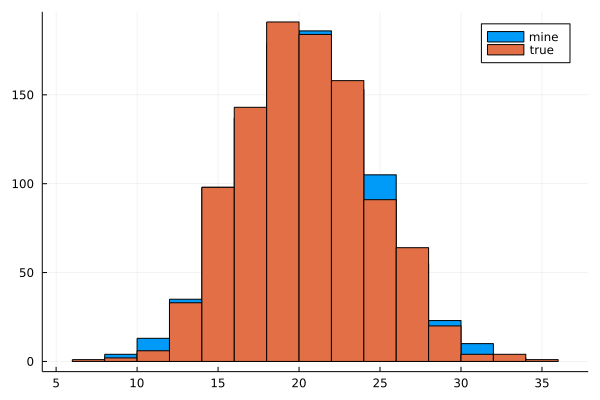

In [82]:
function binomial_rv(n, p)
    num_s = 0
    for i in 1:n
        draw = rand()
        if draw < p
            num_s = num_s + 1 
        end 
    end
    return num_s
end

# Test that we get the binomial distribution 
my_bin = zeros(1000)
true_bin = zeros(1000) 
n = 100 
p = 0.2

for i in 1:1000
    my_bin[i] = binomial_rv(n, p)
    true_bin[i] = rand(Binomial(n,p), 1)[1] 
end

histogram([my_bin true_bin], label = ["mine" "true"])



In [77]:
my_bin

1000-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0